In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

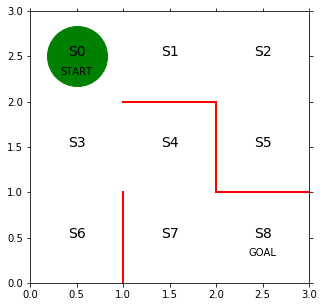

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [5]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
pi_0[1, :]

array([0. , 0.5, 0. , 0.5])

In [7]:
direction = ["up", "right", "down", "left"]
np.random.choice(direction, p=pi_0[1, :])

'right'

In [6]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [7]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [8]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 1], [4, 3], [3, 2], [6, 0], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 3], [3, 2], [6, 0], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は34です


In [9]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [10]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50073529 0.49926471 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.49779413 0.50220587]
 [0.33137448 0.33332949 0.33529603 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [11]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.010836050330365998
迷路を解くのにかかったステップ数は20です
0.006771699198544756
迷路を解くのにかかったステップ数は54です
0.008872631314907398
迷路を解くのにかかったステップ数は40です
0.0065222784312445325
迷路を解くのにかかったステップ数は108です
0.008584272419101757
迷路を解くのにかかったステップ数は36です
0.016743305736668768
迷路を解くのにかかったステップ数は10です
0.012195222627232438
迷路を解くのにかかったステップ数は16です
0.024628917161212127
迷路を解くのにかかったステップ数は8です
0.032411088964921786
迷路を解くのにかかったステップ数は6です
0.010457272838102882
迷路を解くのにかかったステップ数は54です
0.01177146354927977
迷路を解くのにかかったステップ数は46です
0.01428291225384476
迷路を解くのにかかったステップ数は60です
0.024370849529920913
迷路を解くのにかかったステップ数は10です
0.012172701514153561
迷路を解くのにかかったステップ数は42です
0.013287598537661927
迷路を解くのにかかったステップ数は38です
0.007971601965607256
迷路を解くのにかかったステップ数は18です
0.010262551833096767
迷路を解くのにかかったステップ数は26です
0.02432326427276038
迷路を解くのにかかったステップ数は20です
0.011095584221064492
迷路を解くのにかかったステップ数は72です
0.018595992261143612
迷路を解くのにかかったステップ数は10です
0.020772371960008862
迷路を解くのにかかったステップ数は8です
0.032052638795884436
迷路を解くのにかかったステップ数は6です
0.015008040433138303
迷路を解くのにかかったステップ数は20です
0.01659451993706

0.0225437373836109
迷路を解くのにかかったステップ数は6です
0.01706108754750224
迷路を解くのにかかったステップ数は4です
0.016823041231786906
迷路を解くのにかかったステップ数は4です
0.01651446256188835
迷路を解くのにかかったステップ数は10です
0.019363881941791117
迷路を解くのにかかったステップ数は10です
0.01223042139743813
迷路を解くのにかかったステップ数は6です
0.011491603189824173
迷路を解くのにかかったステップ数は10です
0.022200200848688456
迷路を解くのにかかったステップ数は6です
0.01662503879580854
迷路を解くのにかかったステップ数は4です
0.0108367916240385
迷路を解くのにかかったステップ数は8です
0.01886311920612882
迷路を解くのにかかったステップ数は6です
0.009190978355357565
迷路を解くのにかかったステップ数は10です
0.021588025303316355
迷路を解くのにかかったステップ数は10です
0.01647227788450331
迷路を解くのにかかったステップ数は10です
0.016566914505813407
迷路を解くのにかかったステップ数は4です
0.020895595499639347
迷路を解くのにかかったステップ数は8です
0.013972803343944462
迷路を解くのにかかったステップ数は6です
0.016305525146021155
迷路を解くのにかかったステップ数は4です
0.014771688933392008
迷路を解くのにかかったステップ数は8です
0.018715362202733454
迷路を解くのにかかったステップ数は12です
0.016194638347034496
迷路を解くのにかかったステップ数は4です
0.01655439798392222
迷路を解くのにかかったステップ数は12です
0.011825890756593155
迷路を解くのにかかったステップ数は6です
0.016031997399700404
迷路を解くのにかかったステップ数

0.0066164796211167914
迷路を解くのにかかったステップ数は4です
0.008015515327793696
迷路を解くのにかかったステップ数は6です
0.006562748207686792
迷路を解くのにかかったステップ数は4です
0.008403080873050195
迷路を解くのにかかったステップ数は6です
0.00882807019744293
迷路を解くのにかかったステップ数は8です
0.00654908553931513
迷路を解くのにかかったステップ数は4です
0.010352686732900365
迷路を解くのにかかったステップ数は6です
0.006503060026120458
迷路を解くのにかかったステップ数は4です
0.006435631328635033
迷路を解くのにかかったステップ数は4です
0.0063691779760226275
迷路を解くのにかかったステップ数は4です
0.006303682440597716
迷路を解くのにかかったステップ数は4です
0.006239127558506155
迷路を解くのにかかったステップ数は4です
0.009910773363948147
迷路を解くのにかかったステップ数は6です
0.00618996483114273
迷路を解くのにかかったステップ数は4です
0.006127017163531062
迷路を解くのにかかったステップ数は4です
0.006064965164169794
迷路を解くのにかかったステップ数は4です
0.007659908491166739
迷路を解くのにかかったステップ数は6です
0.006021681728649933
迷路を解くのにかかったステップ数は4です
0.010268164032588956
迷路を解くのにかかったステップ数は14です
0.005967362361241499
迷路を解くのにかかったステップ数は4です
0.007611214439799785
迷路を解くのにかかったステップ数は6です
0.005926898602174074
迷路を解くのにかかったステップ数は4です
0.005867797970098995
迷路を解くのにかかったステップ数は4です
0.007559921204804726
迷路を解くのにかかったステ

0.0029823398250210867
迷路を解くのにかかったステップ数は4です
0.002959733175774172
迷路を解くのにかかったステップ数は4です
0.0029373749619924575
迷路を解くのにかかったステップ数は4です
0.0029152616512736207
迷路を解くのにかかったステップ数は4です
0.006620209671318537
迷路を解くのにかかったステップ数は6です
0.002917069491892285
迷路を解くのにかかったステップ数は4です
0.0028951453550340248
迷路を解くのにかかったステップ数は4です
0.0028734604068304734
迷路を解くのにかかったステップ数は4です
0.0028520112671974393
迷路を解くのにかかったステップ数は4です
0.0028307946140759335
迷路を解くのにかかったステップ数は4です
0.002809807182274658
迷路を解くのにかかったステップ数は4です
0.006473948567298063
迷路を解くのにかかったステップ数は6です
0.006550643153857123
迷路を解くのにかかったステップ数は6です
0.002837195231448729
迷路を解くのにかかったステップ数は4です
0.006583485485783476
迷路を解くのにかかったステップ数は6です
0.002841526035211414
迷路を解くのにかかったステップ数は4です
0.0028203076484527925
迷路を解くのにかかったステップ数は4です
0.0027993200217866776
迷路を解くのにかかったステップ数は4です
0.002778559895628127
迷路を解くのにかかったステップ数は4です
0.007537929026285528
迷路を解くのにかかったステップ数は8です
0.0028057164075587157
迷路を解くのにかかったステップ数は4です
0.0027848287893812787
迷路を解くのにかかったステップ数は4です
0.005227218454527026
迷路を解くのにかかったステップ数は6です
0.002775394476243913
迷路

0.00512151470846027
迷路を解くのにかかったステップ数は6です
0.0018047252379391476
迷路を解くのにかかったステップ数は4です
0.0017937974005860086
迷路を解くのにかかったステップ数は4です
0.0017829665997810829
迷路を解くのにかかったステップ数は4です
0.0017722317081761835
迷路を解くのにかかったステップ数は4です
0.0017615916145098456
迷路を解くのにかかったステップ数は4です
0.001751045223335461
迷路を解くのにかかったステップ数は4です
0.001740591454757627
迷路を解くのにかかったステップ数は4です
0.012703856453177419
迷路を解くのにかかったステップ数は8です
0.0017371546884582603
迷路を解くのにかかったステップ数は4です
0.0017268397975976207
迷路を解くのにかかったステップ数は4です
0.007095884849831417
迷路を解くのにかかったステップ数は12です
0.0017525028912288368
迷路を解くのにかかったステップ数は4です
0.0017420629470717916
迷路を解くのにかかったステップ数は4です
0.001731714111255625
迷路を解くのにかかったステップ数は4です
0.001721455344482252
迷路を解くのにかかったステップ数は4です
0.0017112856220049197
迷路を解くのにかかったステップ数は4です
0.004284447946055828
迷路を解くのにかかったステップ数は6です
0.0017170006735676563
迷路を解くのにかかったステップ数は4です
0.0017068747573098578
迷路を解くのにかかったステップ数は4です
0.001696836290852613
迷路を解くのにかかったステップ数は4です
0.0016868842874800602
迷路を解くのにかかったステップ数は4です
0.0016770177741343012
迷路を解くのにかかったステップ数は4です
0.006050604103200782

0.0010879767807534316
迷路を解くのにかかったステップ数は4です
0.0010827813520511015
迷路を解くのにかかったステップ数は4です
0.001077622521430989
迷路を解くのにかかったステップ数は4です
0.001072499949819089
迷路を解くのにかかったステップ数は4です
0.003815985235144353
迷路を解くのにかかったステップ数は6です
0.0010795939746612304
迷路を解くのにかかったステップ数は4です
0.001074451547986896
迷路を解くのにかかったステップ数は4です
0.0010693452807083656
迷路を解くのにかかったステップ数は4です
0.00106427483821174
迷路を解くのにかかったステップ数は4です
0.00105923988970838
迷路を解くのにかかったステップ数は4です
0.0010542401081845947
迷路を解くのにかかったステップ数は4です
0.0038235540701611025
迷路を解くのにかかったステップ数は6です
0.0038343147959224687
迷路を解くのにかかったステップ数は6です
0.001074315727353413
迷路を解くのにかかったステップ数は4です
0.004993209465087377
迷路を解くのにかかったステップ数は8です
0.0010913076431185893
迷路を解くのにかかったステップ数は4です
0.0010860529971029563
迷路を解くのにかかったステップ数は4です
0.0010808358146026098
迷路を解くのにかかったステップ数は4です
0.0010756557431810289
迷路を解くのにかかったステップ数は4です
0.0010705124345067388
迷路を解くのにかかったステップ数は4です
0.0010654055442970538
迷路を解くのにかかったステップ数は4です
0.0010603347322609043
迷路を解くのにかかったステップ数は4です
0.0038778008759984273
迷路を解くのにかかったステップ数は6です
0.0010685391447203922

0.0008321007893390825
迷路を解くのにかかったステップ数は4です
0.0008285265763306911
迷路を解くのにかかったステップ数は4です
0.003612762096244518
迷路を解くのにかかったステップ数は6です
0.0008385057627391251
迷路を解くのにかかったステップ数は4です
0.0008348740947366935
迷路を解くのにかかったステップ数は4です
0.00366452540404507
迷路を解くのにかかったステップ数は6です
0.0037345144662169934
迷路を解くのにかかったステップ数は6です
0.0008604551869713026
迷路を解くのにかかったステップ数は4です
0.0008566402094276407
迷路を解くのにかかったステップ数は4です
0.0008528507814470551
迷路を解くのにかかったステップ数は4です
0.0008490866732667503
迷路を解くのにかかったステップ数は4です
0.0008453476577219288
迷路を解くのにかかったステップ数は4です
0.0008416335102078149
迷路を解くのにかかったステップ数は4です
0.0008379440086471769
迷路を解くのにかかったステップ数は4です
0.0008342789334543875
迷路を解くのにかかったステップ数は4です
0.0008306380675036848
迷路を解くのにかかったステップ数は4です
0.0008270211960936767
迷路を解くのにかかったステップ数は4です
0.0008234281069169798
迷路を解くのにかかったステップ数は4です
0.0008198585900262671
迷路を解くのにかかったステップ数は4です
0.0008163124378048475
迷路を解くのにかかったステップ数は4です
0.0008127894449321167
迷路を解くのにかかったステップ数は4です
0.0008092894083577204
迷路を解くのにかかったステップ数は4です
0.0008058121272656558
迷路を解くのにかかったステップ数は4です
0.000802357403

迷路を解くのにかかったステップ数は10です
0.0005519213584433483
迷路を解くのにかかったステップ数は4です
0.0005499861343787951
迷路を解くのにかかったステップ数は4です
0.0005480610902038538
迷路を解くのにかかったステップ数は4です
0.0005461461543091115
迷路を解くのにかかったステップ数は4です
0.0005442412557205394
迷路を解くのにかかったステップ数は4です
0.0005423463240872735
迷路を解くのにかかったステップ数は4です
0.0005404612896791963
迷路を解くのにかかったステップ数は4です
0.0005385860833761365
迷路を解くのにかかったステップ数は4です
0.0005367206366654921
迷路を解くのにかかったステップ数は4です
0.000534864881633082
迷路を解くのにかかったステップ数は4です
0.0005330187509593326
迷路を解くのにかかったステップ数は4です
0.0005311821779087657
迷路を解くのにかかったステップ数は4です
0.0005293550963288811
迷路を解くのにかかったステップ数は4です
0.0005275374406410391
迷路を解くのにかかったステップ数は4です
0.002459654868088808
迷路を解くのにかかったステップ数は6です
0.00053102586638221
迷路を解くのにかかったステップ数は4です
0.0005292022240541809
迷路を解くのにかかったステップ数は4です
0.0005273879638627264
迷路を解くのにかかったステップ数は4です
0.0005255830213595492
迷路を解くのにかかったステップ数は4です
0.0005237873326503877
迷路を解くのにかかったステップ数は4です
0.0005220008343913458
迷路を解くのにかかったステップ数は4です
0.0005202234637808334
迷路を解くのにかかったステップ数は4です
0.0005184551585556696
迷路を解くのにかかったステッ

0.000372894895168948
迷路を解くのにかかったステップ数は4です
0.0003718203138835703
迷路を解くのにかかったステップ数は4です
0.000370750360733519
迷路を解くのにかかったステップ数は4です
0.00036968500919365953
迷路を解くのにかかったステップ数は4です
0.0003686242329318506
迷路を解くのにかかったステップ数は4です
0.002273712625482106
迷路を解くのにかかったステップ数は6です
0.0018066026440058894
迷路を解くのにかかったステップ数は6です
0.0003770110521026382
迷路を解くのにかかったステップ数は4です
0.002181863845030694
迷路を解くのにかかったステップ数は6です
0.0003810007291890592
迷路を解くのにかかったステップ数は4です
0.0003798885927216479
迷路を解くのにかかったステップ数は4です
0.004988413656102721
迷路を解くのにかかったステップ数は10です
0.00038064472063988747
迷路を解くのにかかったステップ数は4です
0.00037953593002869324
迷路を解くのにかかったステップ数は4です
0.0003784319687845754
迷路を解くのにかかったステップ数は4です
0.0003773328089049892
迷路を解くのにかかったステップ数は4です
0.0003762384225920769
迷路を解くのにかかったステップ数は4です
0.0023041441470541234
迷路を解くのにかかったステップ数は6です
0.00038117559768454864
迷路を解くのにかかったステップ数は4です
0.002207080126577745
迷路を解くのにかかったステップ数は6です
0.00038531275501947626
迷路を解くのにかかったステップ数は4です
0.0003841792094801573
迷路を解くのにかかったステップ数は4です
0.00038305066117636996
迷路を解くのにかかったステップ数は4です
0.00038192

0.00028819945932653107
迷路を解くのにかかったステップ数は4です
0.0002874708503443797
迷路を解くのにかかったステップ数は4です
0.0002867449892415396
迷路を解くのにかかったステップ数は4です
0.0002860218622495539
迷路を解くのにかかったステップ数は4です
0.00028530145568911487
迷路を解くのにかかったステップ数は4です
0.00028458375596452853
迷路を解くのにかかったステップ数は4です
0.006120804627230943
迷路を解くのにかかったステップ数は6です
0.0002867537068528634
迷路を解くのにかかったステップ数は4です
0.00028603188747624957
迷路を解くのにかかったステップ数は4です
0.00028531277585864406
迷路を解くのにかかったステップ数は4です
0.0002845963585175436
迷路を解くのにかかったステップ数は4です
0.00028388262205605863
迷路を解くのにかかったステップ数は4です
0.0002831715531578377
迷路を解くのにかかったステップ数は4です
0.00028246313859193843
迷路を解くのにかかったステップ数は4です
0.00028175736520530403
迷路を解くのにかかったステップ数は4です
0.00028105421992979593
迷路を解くのにかかったステップ数は4です
0.0018615210672115762
迷路を解くのにかかったステップ数は6です
0.0019342748845856926
迷路を解くのにかかったステップ数は6です
0.0019829424749911676
迷路を解くのにかかったステップ数は6です
0.00029311951976077055
迷路を解くのにかかったステップ数は4です
0.0002923695495240068
迷路を解くのにかかったステップ数は4です
0.005847283256193337
迷路を解くのにかかったステップ数は8です
0.00029721743383287307
迷路を解くのにかかったステップ数は4です
0.

0.0002461621530346642
迷路を解くのにかかったステップ数は4です
0.0002455768178761409
迷路を解くのにかかったステップ数は4です
0.00143920492378718
迷路を解くのにかかったステップ数は6です
0.0002473576588999573
迷路を解くのにかかったステップ数は4です
0.0002467692161663027
迷路を解くのにかかったステップ数は4です
0.004880840768325213
迷路を解くのにかかったステップ数は10です
0.00024753873582364534
迷路を解くのにかかったステップ数は4です
0.00024695060068192533
迷路を解くのにかかったステップ数は4です
0.00024636456952992214
迷路を解くのにかかったステップ数は4です
0.00024578063227796883
迷路を解くのにかかったステップ数は4です
0.0002451987788957312
迷路を解くのにかかったステップ数は4です
0.0002446189994143415
迷路を解くのにかかったステップ数は4です
0.0002440412839245093
迷路を解くのにかかったステップ数は4です
0.00024346562257675924
迷路を解くのにかかったステップ数は4です
0.00024289200558048375
迷路を解くのにかかったステップ数は4です
0.00024232042320493537
迷路を解くのにかかったステップ数は4です
0.0002417508657747737
迷路を解くのにかかったステップ数は4です
0.00024118332367584032
迷路を解くのにかかったステップ数は4です
0.0002406177873489155
迷路を解くのにかかったステップ数は4です
0.00024005424729277476
迷路を解くのにかかったステップ数は4です
0.0002394926940631082
迷路を解くのにかかったステップ数は4です
0.0002389331182712888
迷路を解くのにかかったステップ数は4です
0.00023837551058451638
迷路を解くのにかかったステップ数は4です
0.0

0.00021334581308665376
迷路を解くのにかかったステップ数は4です
0.00021287207915580975
迷路を解くのにかかったステップ数は4です
0.00021239993223935195
迷路を解くのにかかったステップ数は4です
0.00021192936520649658
迷路を解くのにかかったステップ数は4です
0.00021146037096638273
迷路を解くのにかかったステップ数は4です
0.010689242533691991
迷路を解くのにかかったステップ数は8です
0.00021235098683573123
迷路を解くのにかかったステップ数は4です
0.00021188164857144538
迷路を解くのにかかったステップ数は4です
0.00021141387361270012
迷路を解くのにかかったステップ数は4です
0.00021094765498016338
迷路を解くのにかかったステップ数は4です
0.00021048298573357604
迷路を解くのにかかったステップ数は4です
0.00021001985897310498
迷路を解くのにかかったステップ数は4です
0.00020955826783480326
迷路を解くのにかかったステップ数は4です
0.00020909820549647878
迷路を解くのにかかったステップ数は4です
0.0023803889169255917
迷路を解くのにかかったステップ数は8です
0.00021412083745800913
迷路を解くのにかかったステップ数は4です
0.00021364391002207626
迷路を解くのにかかったステップ数は4です
0.00021316858668242109
迷路を解くのにかかったステップ数は4です
0.00021269486019831127
迷路を解くのにかかったステップ数は4です
0.00021222272336605952
迷路を解くのにかかったステップ数は4です
0.00021175216902722012
迷路を解くのにかかったステップ数は4です
0.0002112831900602484
迷路を解くのにかかったステップ数は4です
0.00021081577938620623
迷路を解くのにかかったステ

迷路を解くのにかかったステップ数は4です
0.000188962135430331
迷路を解くのにかかったステップ数は4です
0.00018857181804282815
迷路を解くのにかかったステップ数は4です
0.00018818270746803062
迷路を解くのにかかったステップ数は4です
0.00018779479873733823
迷路を解くのにかかったステップ数は4です
0.0001874080869071256
迷路を解くのにかかったステップ数は4です
0.00018702256705945865
迷路を解くのにかかったステップ数は4です
0.0001866382343019852
迷路を解くのにかかったステップ数は4です
0.00018625508376746147
迷路を解くのにかかったステップ数は4です
0.00018587311061294548
迷路を解くのにかかったステップ数は4です
0.00018549231002036072
迷路を解くのにかかったステップ数は4です
0.00018511267719726297
迷路を解くのにかかったステップ数は4です
0.0001847342073743874
迷路を解くのにかかったステップ数は4です
0.00018435689580742314
迷路を解くのにかかったステップ数は4です
0.00018398073777606098
迷路を解くのにかかったステップ数は4です
0.00018360572858402632
迷路を解くのにかかったステップ数は4です
0.0001832318635591381
迷路を解くのにかかったステップ数は4です
0.0001828591380526358
迷路を解くのにかかったステップ数は4です
0.00018248754744001373
迷路を解くのにかかったステップ数は4です
0.00018211708711878515
迷路を解くのにかかったステップ数は4です
0.00018174775251110845
迷路を解くのにかかったステップ数は4です
0.00018137953906232317
迷路を解くのにかかったステップ数は4です
0.00018101244223917706
迷路を解くのにかかったステップ数は4です
0.0001806464575330

0.010329865847374635
迷路を解くのにかかったステップ数は8です
0.00013939198054578258
迷路を解くのにかかったステップ数は4です
0.0001391443932046467
迷路を解くのにかかったステップ数は4です
0.0001388974640381055
迷路を解くのにかかったステップ数は4です
0.00013865119071670984
迷路を解くのにかかったステップ数は4です
0.00013840557092192896
迷路を解くのにかかったステップ数は4です
0.00013816060234486845
迷路を解くのにかかったステップ数は4です
0.00013791628268677684
迷路を解くのにかかったステップ数は4です
0.0001376726096602235
迷路を解くのにかかったステップ数は4です
0.0001374295809847912
迷路を解くのにかかったステップ数は4です
0.00013718719439486868
迷路を解くのにかかったステップ数は4です
0.00013694544763030378
迷路を解くのにかかったステップ数は4です
0.010268911640944402
迷路を解くのにかかったステップ数は8です
0.0001376995305136415
迷路を解くのにかかったステップ数は4です
0.0001374568802197402
迷路を解くのにかかったステップ数は4です
0.00013721486932139794
迷路を解くのにかかったステップ数は4です
0.00013697349557684202
迷路を解くのにかかったステップ数は4です
0.0001367327567543524
迷路を解くのにかかったステップ数は4です
0.00013649265063254284
迷路を解くのにかかったステップ数は4です
0.00013625317499880302
迷路を解くのにかかったステップ数は4です
0.00013601432765046606
迷路を解くのにかかったステップ数は4です
0.001271044278243082
迷路を解くのにかかったステップ数は6です
0.00013788208186137942
迷路を解くのにかかったステップ数は4です
0

迷路を解くのにかかったステップ数は4です
0.00011489816369353659
迷路を解くのにかかったステップ数は4です
0.00011471061071680402
迷路を解くのにかかったステップ数は4です
0.00011452351885445078
迷路を解くのにかかったステップ数は4です
0.00011433688658861463
迷路を解くのにかかったステップ数は4です
0.00011415071240936624
迷路を解くのにかかったステップ数は4です
0.00011396499481089103
迷路を解くのにかかったステップ数は4です
0.00011377973229465856
迷路を解くのにかかったステップ数は4です
0.00011359492336796354
迷路を解くのにかかったステップ数は4です
0.00011341056654454694
迷路を解くのにかかったステップ数は4です
0.00011322666034474342
迷路を解くのにかかったステップ数は4です
0.0001130432032930128
迷路を解くのにかかったステップ数は4です
0.00011286019392219536
迷路を解くのにかかったステップ数は4です
0.0001126776307695948
迷路を解くのにかかったステップ数は4です
0.00011249551238001407
迷路を解くのにかかったステップ数は4です
0.00011231383730150347
迷路を解くのにかかったステップ数は4です
0.00011213260409150341
迷路を解くのにかかったステップ数は4です
0.00011195181131050391
迷路を解くのにかかったステップ数は4です
0.00011177145752659309
迷路を解くのにかかったステップ数は4です
0.00011159154131302335
迷路を解くのにかかったステップ数は4です
0.0011906175827567436
迷路を解くのにかかったステップ数は6です
0.0010098886738399305
迷路を解くのにかかったステップ数は6です
0.00011454206945801966
迷路を解くのにかかったステップ数は4です
0.0012398054308

In [12]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.015 0.985 0.   ]
 [0.    0.234 0.    0.766]
 [0.    0.    0.44  0.56 ]
 [0.01  0.98  0.01  0.   ]
 [0.    0.    0.982 0.018]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [13]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())